In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Credit Approval Data Set
## Pandas implementation
[Data Source](https://archive.ics.uci.edu/ml/datasets/Credit+Approval)

In [2]:
#if you have not data locally, use this

#import data
#data.download_credit_ds()

In [3]:
credit = pd.read_csv("data/credit-approval.csv", header=None, na_values=['?'])
credit.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       678 non-null    float64
 2   2       690 non-null    float64
 3   3       684 non-null    object 
 4   4       684 non-null    object 
 5   5       681 non-null    object 
 6   6       681 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      677 non-null    float64
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [5]:
bool_mask_tf = { 't' : True, 'f' : False }
bool_mask_pm = { '+' : True, '-' : False }

credit[8] = credit[8].map(bool_mask_tf).astype('bool')
credit[9] = credit[9].map(bool_mask_tf).astype('bool')
credit[11] = credit[11].map(bool_mask_tf).astype('bool')
credit[15] = credit[15].map(bool_mask_pm).astype('bool')

In [6]:
print(credit[0].unique())
print(credit[3].unique())
print(credit[4].unique())
print(credit[5].unique())
print(credit[6].unique())
print(credit[12].unique())

['b' 'a' nan]
['u' 'y' nan 'l']
['g' 'p' nan 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
['g' 's' 'p']


In [7]:
credit[0] = credit[0].astype('category')
credit[3] = credit[3].astype('category')
credit[4] = credit[4].astype('category')
credit[5] = credit[5].astype('category')
credit[6] = credit[6].astype('category')
credit[12] = credit[12].astype('category')

## Task 1
Fix nan values

In [8]:
#amount of raws with na
print(credit.isna().sum())
print(f"Sum : {credit.isna().any(axis=1).sum()}")

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64
Sum : 37


In [9]:
credit[13].fillna(credit[13].mean(), inplace=True)
credit[1].fillna(credit[1].mean(), inplace=True)

for i in [0, 3, 4, 5, 6]:
    credit[i].fillna(credit[i].mode()[0], inplace=True)

## Task 2
Normalize data

In [10]:
def norm_normalize(data):    
    return data / np.linalg.norm(data, axis=0)

def min_max_normalize(data):    
    shift = data - data.min()
    return np.divide(shift, data.max() - data.min())

def mean_normalize(data):
    shift = data - data.mean()
    return np.divide(shift, data.max() - data.min())

def standardize(data):
    shift = data - data.mean()
    return np.divide(shift, data.std())

In [11]:
norm_normalize(credit.select_dtypes(include=[float, int])).describe()

,1,2,7,10,13,14
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.035643,0.026316,0.021078,0.016858,0.027809,0.007301
std,0.013383,0.027529,0.031725,0.034158,0.026017,0.037390
min,0.015525,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025596,0.005530,0.001564,0.000000,0.012090,0.000000
50%,0.032320,0.015207,0.009480,0.000000,0.024180,0.000036
75%,0.042575,0.039857,0.024885,0.021072,0.041106,0.002838
max,0.090609,0.154840,0.270179,0.470619,0.302249,0.717640


In [12]:
min_max_normalize(credit.select_dtypes(include=[float, int]))

,1,2,7,10,13,14
0,0.256842,0.000000,0.043860,0.014925,0.1010,0.00000
1,0.675489,0.159286,0.106667,0.089552,0.0215,0.00560
2,0.161654,0.017857,0.052632,0.000000,0.1400,0.00824
3,0.211729,0.055000,0.131579,0.074627,0.0500,0.00003
4,0.096541,0.200893,0.060000,0.000000,0.0600,0.00000
...,...,...,...,...,...,...
685,0.110226,0.360179,0.043860,0.000000,0.1300,0.00000
686,0.134135,0.026786,0.070175,0.029851,0.1000,0.00394
687,0.172932,0.482143,0.070175,0.014925,0.1000,0.00001
688,0.062707,0.007321,0.001404,0.000000,0.1400,0.00750


In [13]:
mean_normalize(credit.select_dtypes(include=[float, int]))

,1,2,7,10,13,14
0,-0.011100,-0.169954,-0.034155,-0.020896,0.008993,-0.010174
1,0.407546,-0.010669,0.028652,0.053731,-0.070507,-0.004574
2,-0.106288,-0.152097,-0.025383,-0.035821,0.047993,-0.001934
3,-0.056213,-0.114954,0.053565,0.038806,-0.042007,-0.010144
4,-0.171401,0.030938,-0.018014,-0.035821,-0.032007,-0.010174
...,...,...,...,...,...,...
685,-0.157717,0.190224,-0.034155,-0.035821,0.037993,-0.010174
686,-0.133807,-0.143169,-0.007839,-0.005970,0.007993,-0.006234
687,-0.095010,0.312188,-0.007839,-0.020896,0.007993,-0.010164
688,-0.205236,-0.162633,-0.076611,-0.035821,0.047993,-0.002674


In [14]:
standardize(credit.select_dtypes(include=[float, int]))

,1,2,7,10,13,14
0,-0.062276,-0.955920,-0.290872,-0.287892,0.104469,-0.195272
1,2.286443,-0.060007,0.244013,0.740293,-0.819095,-0.087788
2,-0.596305,-0.855481,-0.216167,-0.493529,0.557537,-0.037117
3,-0.315370,-0.646569,0.456175,0.534656,-0.488006,-0.194696
4,-0.961605,0.174015,-0.153415,-0.493529,-0.371835,-0.195272
...,...,...,...,...,...,...
685,-0.884833,1.069928,-0.290872,-0.493529,0.441366,-0.195272
686,-0.750693,-0.805262,-0.066758,-0.082255,0.092851,-0.119649
687,-0.533032,1.755924,-0.066758,-0.287892,0.092851,-0.195080
688,-1.151426,-0.914740,-0.652442,-0.493529,0.557537,-0.051321


In [15]:
for column in credit.select_dtypes([np.number]).columns:
    credit[column] = min_max_normalize(credit[column])

## Task 3
Build a bar plot by one of the features (count of items in the 10 bins)

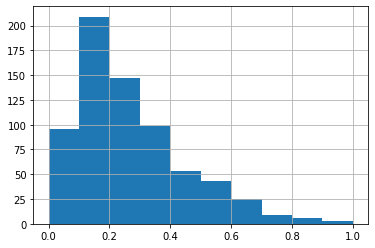

In [16]:
credit[1].hist(bins=10)
#sns.distplot(counts, bins=counts.index)

## Task 4
Build lineplot of two numerical features

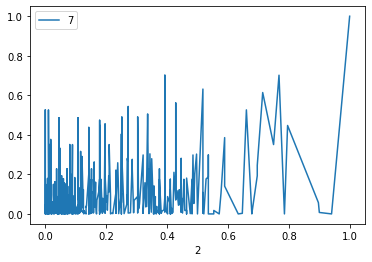

In [17]:
credit.sort_values(by=2).plot(x=2, y=7)

## Task 5
Calculate Pearson's and Spearman's correlations

In [18]:
pearson_corr = credit.corr()
spearman_corr = credit.corr('spearman')

In [19]:
pearson_corr

,1,2,7,8,9,10,11,13,14,15
1,1.000000,0.201316,0.392787,0.204342,0.083681,0.185575,0.054778,-0.077161,0.018539,0.161627
2,0.201316,1.000000,0.298902,0.244317,0.174846,0.271207,-0.013023,-0.222346,0.123121,0.206294
7,0.392787,0.298902,1.000000,0.345689,0.222982,0.322330,0.138139,-0.076389,0.051345,0.322475
8,0.204342,0.244317,0.345689,1.000000,0.432032,0.379532,0.091276,-0.067388,0.090012,0.720407
9,0.083681,0.174846,0.222982,0.432032,1.000000,0.571498,0.017043,-0.053321,0.077652,0.458301
10,0.185575,0.271207,0.322330,0.379532,0.571498,1.000000,0.006944,-0.119809,0.063692,0.406410
11,0.054778,-0.013023,0.138139,0.091276,0.017043,0.006944,1.000000,0.144253,0.019201,0.031625
13,-0.077161,-0.222346,-0.076389,-0.067388,-0.053321,-0.119809,0.144253,1.000000,0.065609,-0.099972
14,0.018539,0.123121,0.051345,0.090012,0.077652,0.063692,0.019201,0.065609,1.000000,0.175657
15,0.161627,0.206294,0.322475,0.720407,0.458301,0.406410,0.031625,-0.099972,0.175657,1.000000


In [20]:
spearman_corr

,1,2,7,8,9,10,11,13,14,15
1,1.000000,0.114652,0.255770,0.203061,0.057609,0.118208,0.091566,-0.009336,0.039598,0.149451
2,0.114652,1.000000,0.266057,0.247055,0.161553,0.204199,0.029904,-0.293752,0.106388,0.190309
7,0.255770,0.266057,1.000000,0.427475,0.277400,0.314813,0.208269,-0.037252,0.086870,0.379366
8,0.203061,0.247055,0.427475,1.000000,0.432032,0.483142,0.091276,-0.102147,0.193923,0.720407
9,0.057609,0.161553,0.277400,0.432032,1.000000,0.951591,0.017043,-0.095345,0.407571,0.458301
10,0.118208,0.204199,0.314813,0.483142,0.951591,1.000000,0.018131,-0.133705,0.427244,0.510916
11,0.091566,0.029904,0.208269,0.091276,0.017043,0.018131,1.000000,0.160826,-0.071575,0.031625
13,-0.009336,-0.293752,-0.037252,-0.102147,-0.095345,-0.133705,0.160826,1.000000,-0.065390,-0.129940
14,0.039598,0.106388,0.086870,0.193923,0.407571,0.427244,-0.071575,-0.065390,1.000000,0.282205
15,0.149451,0.190309,0.379366,0.720407,0.458301,0.510916,0.031625,-0.129940,0.282205,1.000000


## Task 6
One-hot encoding

In [21]:
pd.get_dummies(credit)

,1,2,7,8,9,10,11,13,14,15,...,6_ff,6_h,6_j,6_n,6_o,6_v,6_z,12_g,12_p,12_s
0,0.256842,0.000000,0.043860,True,True,0.014925,False,0.1010,0.00000,True,...,0,0,0,0,0,1,0,1,0,0
1,0.675489,0.159286,0.106667,True,True,0.089552,False,0.0215,0.00560,True,...,0,1,0,0,0,0,0,1,0,0
2,0.161654,0.017857,0.052632,True,False,0.000000,False,0.1400,0.00824,True,...,0,1,0,0,0,0,0,1,0,0
3,0.211729,0.055000,0.131579,True,True,0.074627,True,0.0500,0.00003,True,...,0,0,0,0,0,1,0,1,0,0
4,0.096541,0.200893,0.060000,True,False,0.000000,False,0.0600,0.00000,True,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.110226,0.360179,0.043860,False,False,0.000000,False,0.1300,0.00000,False,...,0,1,0,0,0,0,0,1,0,0
686,0.134135,0.026786,0.070175,False,True,0.029851,True,0.1000,0.00394,False,...,0,0,0,0,0,1,0,1,0,0
687,0.172932,0.482143,0.070175,False,True,0.014925,True,0.1000,0.00001,False,...,1,0,0,0,0,0,0,1,0,0
688,0.062707,0.007321,0.001404,False,False,0.000000,False,0.1400,0.00750,False,...,0,0,0,0,0,1,0,1,0,0


## Task 7
Visualize data